In [1]:
'''
Natural Language Processing
Homework nr.1
'''

'\nNatural Language Processing\nHomework nr.1\n'

In [2]:
#task 1

In [3]:
f = open("blackhol.txt", "r")
text_f = f.read().lower()
print(text_f)

                           combat arms
                         2869 grove way
              castro valley, california 94546-6709
                    telephone (415) 538-6544


     the following material was downloaded from the nasa spacelink
bbs at the national aeronautics and space administration, george c.
marshall space flight center, marshall space flight center, alabama
35812 on 11/16/88.



b l a c k    h o l e s    i n    s p a c e
-------------------------------------------------------------
 
     there is much more to black holes than meets the eye.  in fact,
your eyes, even with the aid of the most advanced telescope, will
never see a black hole in space.  the reason is that the matter
within a black hole is so dense and has so great a gravitational pull
that it prevents even light from escaping.
 
     like other electromagnetic radiation (radio waves, infrared
rays, ultraviolet radiation, x-rays, and gamma radiation), light is
the fastest traveler in the universe.  it mo

In [4]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import casual_tokenize
import spacy
nlp_model = spacy.load("en_core_web_sm")
doc = nlp_model(text_f)

In [5]:
# easy way

In [6]:
unique_tokens = word_tokenize(text_f)
print("The number of unique tokens obtained with 'word_tokenize': " + str(len(unique_tokens)))
unique_tokens1 = casual_tokenize(text_f)
print("The number of unique tokens obtained with 'casual_tokenize': " + str(len(unique_tokens1)))


The number of unique tokens obtained with 'word_tokenize': 2870
The number of unique tokens obtained with 'casual_tokenize': 2754


In [7]:
# another way

In [8]:
seen = []
for token in doc:
    if token.text not in seen:
        seen.append(token.text)

In [9]:
seen

['                           ',
 'combat',
 'arms',
 '\n                         ',
 '2869',
 'grove',
 'way',
 '\n              ',
 'castro',
 'valley',
 ',',
 'california',
 '94546',
 '-',
 '6709',
 '\n                    ',
 'telephone',
 '(',
 '415',
 ')',
 '538',
 '6544',
 '\n\n\n     ',
 'the',
 'following',
 'material',
 'was',
 'downloaded',
 'from',
 'nasa',
 'spacelink',
 '\n',
 'bbs',
 'at',
 'national',
 'aeronautics',
 'and',
 'space',
 'administration',
 'george',
 'c.',
 'marshall',
 'flight',
 'center',
 'alabama',
 '35812',
 'on',
 '11/16/88',
 '.',
 '\n\n\n\n',
 'b',
 'l',
 'a',
 'c',
 'k',
 '   ',
 'h',
 'o',
 'e',
 's',
 'i',
 'n',
 'p',
 '-------------------------------------------------------------',
 '\n \n     ',
 'there',
 'is',
 'much',
 'more',
 'to',
 'black',
 'holes',
 'than',
 'meets',
 'eye',
 ' ',
 'in',
 'fact',
 'your',
 'eyes',
 'even',
 'with',
 'aid',
 'of',
 'most',
 'advanced',
 'telescope',
 'will',
 'never',
 'see',
 'hole',
 'reason',
 'that',

In [10]:
nr_unique_tokens = len(seen)
nr_unique_tokens

792

In [11]:
total_nr_tokens = len(doc)
total_nr_tokens

3154

In [12]:
print(f"Number of unique tokens is {nr_unique_tokens}.")

Number of unique tokens is 792.


In [13]:
# task 2

In [14]:
sentences = sent_tokenize(text_f)
print("The number of sentences: " + str(len(sentences)))
print(f"number of sentences from doc {len(list(doc.sents))}") 

The number of sentences: 124
number of sentences from doc 127


In [15]:
mean_value = total_nr_tokens/len(sentences)
print(f"The mean number of words per sentence is {int(mean_value)}.")

The mean number of words per sentence is 25.


In [16]:
# task 3 (Lemmatization)

In [17]:
data = []

for token in doc:
    data.append([token.text, token.lemma_])
    
#print(data)

In [18]:
import pandas as pd
df_lem = pd.DataFrame(data, columns=['Original', 'Lemma'])
df_lem

,Original,Lemma
0,,
1,combat,combat
2,arms,arm
3,\n,\n
4,2869,2869
...,...,...
3149,and,and
3150,nothing,nothing
3151,can,can
3152,\n,\n


In [19]:
# task 4 (Vectorization)

In [20]:
# 4.1 Bag of words

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [22]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(sentences)
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
print(df_vect)

     000  10  11  1504  16  186  1914  20  2500  28  ...  widespread  will  \
0      0   0   1     0   1    0     0   0     0   0  ...           0     0   
1      0   0   0     0   0    0     0   0     0   0  ...           0     0   
2      0   0   0     0   0    0     0   0     0   0  ...           0     1   
3      0   0   0     0   0    0     0   0     0   0  ...           0     0   
4      0   0   0     0   0    0     0   0     0   0  ...           0     0   
..   ...  ..  ..   ...  ..  ...   ...  ..   ...  ..  ...         ...   ...   
119    0   0   0     0   0    0     0   0     0   0  ...           0     0   
120    0   0   0     0   0    0     0   0     0   0  ...           0     0   
121    0   0   0     0   0    0     0   0     0   0  ...           0     0   
122    0   0   0     0   0    0     0   0     0   0  ...           0     0   
123    0   0   0     0   0    0     0   0     0   0  ...           0     0   

     with  within  wormholes  would  years  yet  you  your  
0 

In [23]:
#sentences

In [24]:
df_vect

,000,10,11,1504,16,186,1914,20,2500,28,...,widespread,will,with,within,wormholes,would,years,yet,you,your
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# 4.2 TF-IDF

In [26]:
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [27]:
Document = []
for sentences in doc:
    Document.append(f"{sentences}")

In [28]:
X = vectorizer.fit_transform(Document)

In [29]:
Document

['                           ',
 'combat',
 'arms',
 '\n                         ',
 '2869',
 'grove',
 'way',
 '\n              ',
 'castro',
 'valley',
 ',',
 'california',
 '94546',
 '-',
 '6709',
 '\n                    ',
 'telephone',
 '(',
 '415',
 ')',
 '538',
 '-',
 '6544',
 '\n\n\n     ',
 'the',
 'following',
 'material',
 'was',
 'downloaded',
 'from',
 'the',
 'nasa',
 'spacelink',
 '\n',
 'bbs',
 'at',
 'the',
 'national',
 'aeronautics',
 'and',
 'space',
 'administration',
 ',',
 'george',
 'c.',
 '\n',
 'marshall',
 'space',
 'flight',
 'center',
 ',',
 'marshall',
 'space',
 'flight',
 'center',
 ',',
 'alabama',
 '\n',
 '35812',
 'on',
 '11/16/88',
 '.',
 '\n\n\n\n',
 'b',
 'l',
 'a',
 'c',
 'k',
 '   ',
 'h',
 'o',
 'l',
 'e',
 's',
 '   ',
 'i',
 'n',
 '   ',
 's',
 'p',
 'a',
 'c',
 'e',
 '\n',
 '-------------------------------------------------------------',
 '\n \n     ',
 'there',
 'is',
 'much',
 'more',
 'to',
 'black',
 'holes',
 'than',
 'meets',
 'the',
 '

In [30]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=X[0] 
# place tf-idf values in a pandas data frame 
df_tfidf = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names(), columns=['tfidf']) 
df_tfidf.sort_values(by=['tfidf'],ascending=False)

,tfidf
000,0.0
play,0.0
penrose,0.0
pepper,0.0
per,0.0
...,...
exhausts,0.0
exhibiting,0.0
exist,0.0
existence,0.0


In [31]:
unique_tokens0 = word_tokenize(text_f)
word_frequency_distribution = FreqDist(unique_tokens0)
words_list = []
freqs_list = []

for w, f in word_frequency_distribution.items():
    if f > 2:
        words_list.append(w)
        freqs_list.append(f)
        
freqs_list, words_list = zip(*sorted(zip(freqs_list, words_list)))

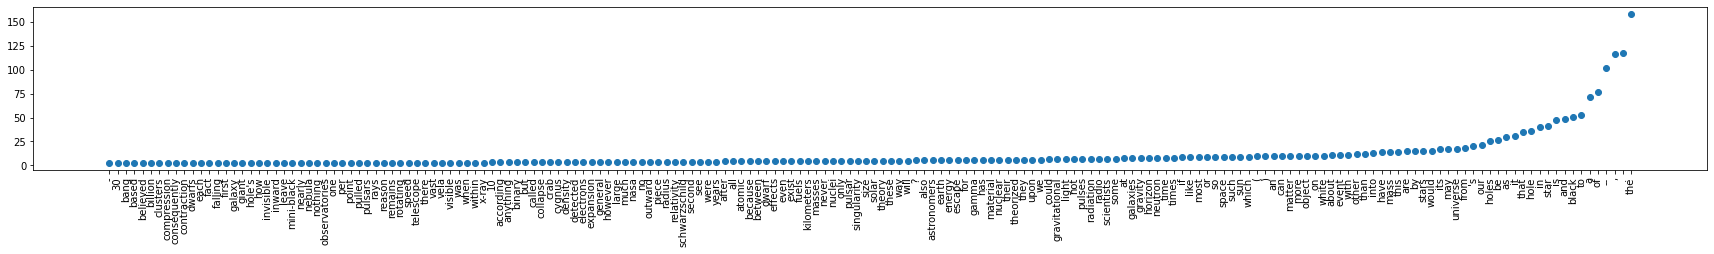

In [32]:
from matplotlib import pyplot
pyplot.figure(figsize=(30, 3))
pyplot.xticks(rotation='vertical')
pyplot.scatter(words_list, freqs_list)

In [33]:
# task 5 Part of speech tagging

In [34]:
from collections import Counter
tag = word_tokenize(text_f)
tags = nltk.pos_tag(tag)
counts = Counter( tag for word,  tag in tags)
print(counts)

Counter({'NN': 502, 'IN': 332, 'JJ': 289, 'DT': 283, 'NNS': 200, '.': 123, ',': 116, 'RB': 115, ':': 106, 'VB': 97, 'VBZ': 88, 'VBN': 82, 'CC': 64, 'MD': 58, 'TO': 53, 'PRP': 49, 'PRP$': 45, 'VBG': 44, 'VBP': 43, 'CD': 38, 'VBD': 30, 'POS': 21, 'WDT': 17, 'JJR': 14, '(': 10, ')': 10, 'WRB': 7, 'RBR': 6, 'JJS': 6, 'RBS': 4, 'RP': 4, 'EX': 3, 'WP': 3, 'PDT': 2, '``': 2, "''": 2, 'WP$': 1, 'NNP': 1})


In [35]:
print('The most common part of speech is NN (noun, common, singular or mass).')
print('The least common part of speech is NNP (noun, proper, singular).')

The most common part of speech is NN (noun, common, singular or mass).
The least common part of speech is NNP (noun, proper, singular).


In [36]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [37]:
for token in doc:
    print(token.text, token.pos, token.pos_)

                            103 SPACE
combat 92 NOUN
arms 92 NOUN

                          103 SPACE
2869 93 NUM
grove 92 NOUN
way 92 NOUN

               103 SPACE
castro 96 PROPN
valley 96 PROPN
, 97 PUNCT
california 96 PROPN
94546 93 NUM
- 99 SYM
6709 93 NUM

                     103 SPACE
telephone 92 NOUN
( 97 PUNCT
415 93 NUM
) 97 PUNCT
538 93 NUM
- 99 SYM
6544 93 NUM



      103 SPACE
the 90 DET
following 84 ADJ
material 92 NOUN
was 87 AUX
downloaded 100 VERB
from 85 ADP
the 90 DET
nasa 96 PROPN
spacelink 96 PROPN

 103 SPACE
bbs 96 PROPN
at 85 ADP
the 90 DET
national 96 PROPN
aeronautics 96 PROPN
and 89 CCONJ
space 96 PROPN
administration 92 NOUN
, 97 PUNCT
george 96 PROPN
c. 96 PROPN

 103 SPACE
marshall 96 PROPN
space 92 NOUN
flight 92 NOUN
center 92 NOUN
, 97 PUNCT
marshall 92 NOUN
space 92 NOUN
flight 96 PROPN
center 96 PROPN
, 97 PUNCT
alabama 96 PROPN

 103 SPACE
35812 93 NUM
on 85 ADP
11/16/88 93 NUM
. 97 PUNCT




 103 SPACE
b 96 PROPN
l 92 NOUN
a 90 DET
c 92 NOUN
k 

In [38]:
nouns = []
adjectives = []
for token in doc:
     if token.pos_ == 'NOUN':
        nouns.append(token)
     if token.pos_ == 'ADJ':
         adjectives.append(token)
all = ['Nouns:', nouns, 'Adj:', adjectives]

In [39]:
all

['Nouns:',
 [combat,
  arms,
  grove,
  way,
  telephone,
  material,
  administration,
  space,
  flight,
  center,
  marshall,
  space,
  l,
  c,
  h,
  l,
  e,
  p,
  c,
  e,
  holes,
  eye,
  fact,
  eyes,
  aid,
  telescope,
  hole,
  space,
  reason,
  matter,
  hole,
  pull,
  radiation,
  radio,
  waves,
  rays,
  ultraviolet,
  radiation,
  x,
  -,
  rays,
  gamma,
  radiation,
  light,
  traveler,
  universe,
  kilometers,
  miles,
  second,
  speed,
  earth,
  times,
  heartbeats,
  light,
  hole,
  way,
  hole,
  fact,
  evidence,
  existence,
  holes,
  observation,
  solutions,
  equations,
  theory,
  relativity,
  things,
  calculations,
  holes,
  variety,
  sizes,
  holes,
  holes,
  universe,
  years,
  expansion,
  parts,
  matter,
  universe,
  parts,
  superdense,
  holes,
  holes,
  holes,
  hole,
  particle,
  mass,
  material,
  power,
  hole,
  event,
  decompress,
  millions,
  hydrogen,
  bombs,
  stars,
  support,
  theory,
  hole,
  end,
  product,
  star,

In [40]:
# could not do task 5

In [41]:
# task 6

In [42]:
from spacy import displacy
displacy.render(doc, style="ent")